In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Suppress scientific notation in prints
np.set_printoptions(suppress=True)

# Univariate regression

We have a given dataset 

$$
    (X, y) \in \mathbb{R}^{m \times 2},
$$

with $m$ the number of samples.

In the dateset we have the features 

$$
    X \in \mathbb{R}^m
$$ 

and the targets 

$$
    y \in \mathbb{R}^m.
$$

We say

$$
    (X^{(i)}, y^{(i)}) \in \mathbb{R}^{1 \times 2}
$$

is the $i$-th example $(i = 1, \dots, m)$.

## Linear regression

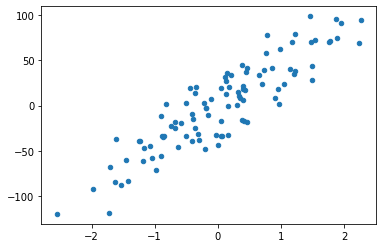

In [3]:
# Make simple example
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=0)

# Plot data
plt.scatter(X, y, s=20)
plt.show()

In [4]:
# Split data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70, 1), (30, 1), (70,), (30,))

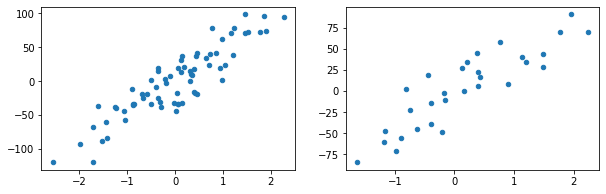

In [5]:
# Plot training and test sets
def plot_train_test(X_train, X_test):
    """Plot training and test sets side by side.
        
    Parameter
    ---------
        X_train : ndarray of shape (n_samples, n_features)
            Training features.
        X_train : ndarray of shape (n_samples, n_features)
            Test features.   
    """
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
    axs[0].scatter(X_train, y_train, s=20)
    axs[1].scatter(X_test, y_test, s=20)
    return fig, axs

# Plot training and test sets
plot_train_test(X_train, X_test)
plt.show()

### Hypothesis

The hypothesis for *linear regression* is given by

$$
    h_{w, b}(x) = w x + b, 
$$

where $w \in \mathbb{R}$ is the weight (coefficent) and $b \in \mathbb{R}$ is the bias (intercept).

<!-- We can also write

$$
    h_{w}(x) = \sum_{j=1}^2 w_j x =  w_0 + w_1 x,
$$

if we set $w_1 := w$ and $w_0 := b$ and $x_0 := 1$. -->

In [6]:
# Compute the hypothesis and return as shape (n_samples,)
hypo = lambda X, w, b: np.sum(w * X, axis=1) + b

### Cost function

The cost function (*mean squared error*) for *linear regression* is given by

$$
\begin{align*}
    MSE(w,b) &= \| y^{(i)} - h_{w,b}(x^{(i)}) \|_2 \\
             &= \frac{1}{m} \sum\limits_{i=1}^m \left( y^{(i)} - h_{w,b}(x^{(i)}) \right)^2 \\
             &= \frac{1}{m} \sum\limits_{i=1}^m \left( y^{(i)} - (w x^{(i)} + b) \right)^2 ,
\end{align*}
$$

where $m$ is the number of samples.

In [7]:
# Compute the cost function (mean squared error)
mse = lambda X, y, w, b: np.mean(np.square(y - hypo(X, w, b)))

### Gradient descent

#### Goal

$$
    \underset{w \in \mathbb{R}, ~ b \in \mathbb{R}}{\textbf{minimize}} MSE(w,b)
$$

#### Idea

$$
\begin{align*}
    w &= w - \alpha \cdot \frac{\partial}{\partial w} MSE(w,b) \\
    b &= b - \alpha \cdot \frac{\partial}{\partial b} MSE(w,b)
\end{align*}
$$

#### Partial derivaties

$$
\begin{align*}
    \frac{\partial}{\partial w} MSE(w,b) &= \frac{2}{m} \sum\limits_{i=1}^m x^{(i)} \left( y^{(i)} - h_{w,b}(x^{(i)}) \right) \\
    \frac{\partial}{\partial b} MSE(w,b) &= \frac{2}{m} \sum\limits_{i=1}^m y^{(i)} - h_{w,b}(x^{(i)})
\end{align*}
$$

In [8]:
def gradient_descent(X, y, w, b, alpha, num_iters):  
    """Simple gradient descent.
    
    TODO: Plot cost function.
    
    Parameter
    ---------
        X : ndarray of shape (n_samples, n_features)
            Features.
        y : ndarray of shape (n_samples,)
            Labels.
        w : float
            Weight.
        b : float
            Bias.
        alpha : float
            Stepsize.
        num_iter : int
            Number of iterations.
    
    Return
    ------
        w : float
            Updated weight.
        b : float
            Updated bias.
    """
    # Number of samples
    m = len(X)
    
    # Iteratively update the weight and bias
    for i in range(0, num_iters):
        
        # Compute predictions (for all samples)
        predictions = hypo(X, w, b)
        
        # Compute residuals (for all samples)
        residuals = predictions - y
        
        # Compute partial derivitaves 
        w_gradient = 2 * np.mean(residuals.reshape(-1, 1) * X, axis=0)
        b_gradient = 2 * np.mean(residuals)

        # Update weight and bias
        w = w - alpha * w_gradient
        b = b - alpha * b_gradient
        
    return w, b

In [9]:
def linear_regression(X, y, alpha, num_iters, tol=None):
    """Linear regression using gradient descent.
    
    Parameter
    ---------
        X : ndarray of shpae (n_samples, n_features)
            Features.
        y : ndarray of shape (n_samples,)
            Labels.        
        alpha : float
            Stepsize.
        num_iter : int
            Number of iterations.
    
    Return
    ------
        w : float
            Updated weight.
        b : float
            Updated bias.
    """
    w = np.zeros(X.shape[1])
    b = 0.0
    w, b = gradient_descent(X, y, w, b, alpha, num_iters)
    if tol:
        pass
    return w, b

In [10]:
w, b = linear_regression(X_train, y_train, 0.0001, 10000)
w, b

(array([38.48624797]), -0.5013415494516644)

In [11]:
# Plot training and test sets and regression lines
def plot_train_test_reg_line(X_train, X_test, w, b):
    fig, axs = plot_train_test(X_train, X_test)
    for i, iX in enumerate([X_train, X_test]):
        xlim = axs[i].get_xlim()
        xx = np.linspace(xlim[0], xlim[1], 2).reshape(-1, 1)
        axs[i].plot(xx, hypo(xx, w, b), c='r')

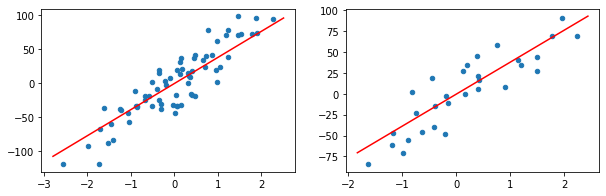

In [12]:
# Plot training and test sets and regression lines
plot_train_test_reg_line(X_train, X_test, w, b)
plt.show()

In [13]:
mse(X_train, y_train, w, b), mse(X_test, y_test, w, b)

(497.2552852359031, 429.1012773684371)

### $R^2$ score

The residual sum of squares is defined by

$$
    SS_{res} = \sum_{i=1}^m \left( y^{(i)} - h_{w,b}(x^{(i)}) \right)^2.
$$

The total sum of squares is defined by

$$
    SS_{res} = \sum_{i=1}^m \left( y^{(i)} - \frac{1}{n} \sum_{i=1}^n y^{(i)} \right)^2.
$$

The $R^2$ score (or coefficient of determenation) is then defined by

$$
    R^2 = 1 - {SS_{\rm res}\over SS_{\rm tot}}.
$$

In [14]:
# Function for residual sum of squares
ss_res = lambda X, y, w, b: np.sum(np.square(y - hypo(X, w, b)))

# Function for total sum of squares
ss_tot = lambda y: np.sum(np.square(y - np.mean(y)))

# Function for coefficient of determination aka R^2
r2 = lambda X, y, w, b: 1 - ss_res(X, y, w, b) / ss_tot(y)

In [15]:
r2(X_train, y_train, w, b), r2(X_test, y_test, w, b)

(0.7977347885718972, 0.784711491709911)

### Standardization 

Standardization (z-score normalization) is given by

$$
    x' = \frac{x - \mu}{\sigma},
$$

where $\mu$ is the mean of the input data $x$ and $\sigma$ the variance.

#### Why standardize?

![Alt text](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmiro.medium.com%2Fmax%2F2972%2F1*vXpodxSx-nslMSpOELhovg.png&f=1&nofb=1)

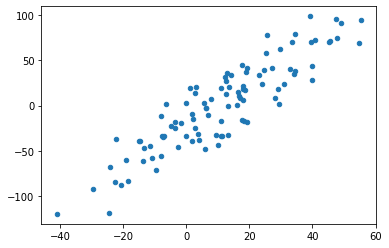

In [16]:
# Scale features
X *= 20

# Shift features
X += 10

# Plot data
plt.scatter(X, y, s=20)
plt.show()

In [17]:
# Show mean and standard derivation
X.mean(), X.std()

(11.196160310689699, 20.157644894331593)

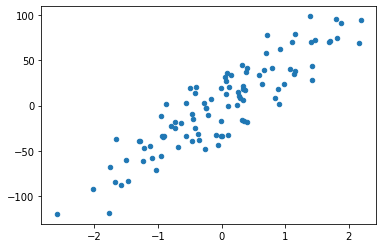

In [18]:
# Standardize features
X_std = StandardScaler().fit_transform(X)

# Plot data
plt.scatter(X_std, y, s=20)
plt.show()

In [19]:
# Show mean and standard derivation
X_std.mean(), X_std.std()

(7.105427357601002e-17, 0.9999999999999999)

### Normal equation

If we say that $\theta_0 := b$ and $\theta_1 := w$ and say that $\hat{X}_1 := \vec{1}$ and $\hat{X}_1 = X$, where $\hat{X}_i$ is the $i$-th column of $\hat{X}$, then we can derive normal equation or closed form for linear regression which is given by

$$
    \theta = (\hat{X}^T \hat{X})^{-1} \hat{X}^{T} y.
$$



In [20]:
def normal_equation(X, y):
    """Normal equation for linear regression.
    
    Parameter
    ---------
        X : ndarray of shape (n_samples, n_features)
            Features.
        y : ndarray of shape (n_samples,)
            Labels.
    
    Return:
    -------
        theta : ndarray of shape (n_features + 1,)
            Weight(s) and bias.
    """
    X_hat = np.column_stack([np.ones(X.shape[0]), X])
    X_hat_trans = np.transpose(X_hat)
    result = np.linalg.inv(np.dot(X_hat_trans, X_hat))
    result = np.dot(np.dot(result, X_hat_trans), y)
    return result

In [21]:
# Apply the normal equation
theta = normal_equation(X_train, y_train)
w, b = theta[1], theta[0]
w, b

(44.25911111918541, -0.7229410334791733)

In [22]:
# Compute training and test MSE
mse(X_train, y_train, w, b), mse(X_test, y_test, w, b)

(463.2862910257436, 451.2402377855187)

In [23]:
# Compute training and test R2
r2(X_train, y_train, w, b), r2(X_test, y_test, w, b)

(0.8115521294829311, 0.7736039420132121)

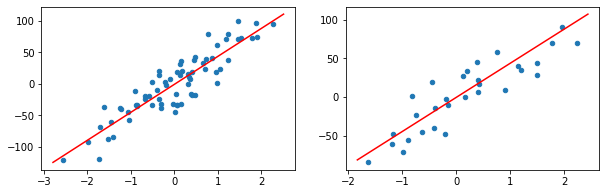

In [24]:
# Plot training and test sets and regression lines
plot_train_test_reg_line(X_train, X_test, w, b)
plt.show()

## Polynomial regression

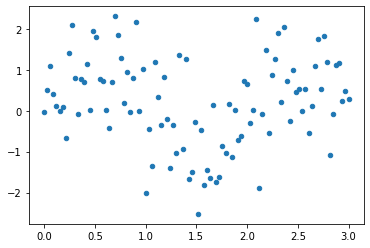

In [25]:
# Make example regression problem
n_samples = 100
X = np.linspace(0, 3, n_samples)
eps = np.random.normal(0, 1, n_samples)
y = np.sin(math.pi * X) + eps
X = X.reshape(-1, 1)

# Plot datapoints
plt.scatter(X, y, s=20)
plt.show()

In [26]:
# Split data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70, 1), (30, 1), (70,), (30,))

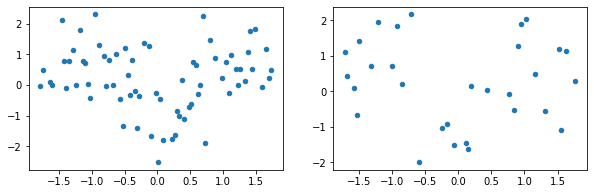

In [27]:
# Standardize training and test sets
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Plot training and test sets
plot_train_test(X_train, X_test)
plt.show()

In [28]:
# Apply normal equation
theta = normal_equation(X_train, y_train)
w, b = theta[1], theta[0]
w, b

(-0.02918502619038879, 0.21206549513282744)

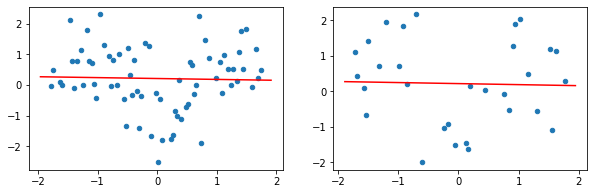

In [29]:
# Plot training and test sets and regression lines
plot_train_test_reg_line(X_train, X_test, w, b)
plt.show()

In [30]:
# Compute training and test MSE
mse(X_train, y_train, w, b), mse(X_test, y_test, w, b)

(1.0707226217544172, 1.3976157699394938)

In [31]:
# Compute training and test R2
r2(X_train, y_train, w, b), r2(X_test, y_test, w, b)

(0.0007948731918778762, 0.002201711652872418)

### Hypothesis

The hypothesis for (univariate) *polynomial regression* is given by

$$
    h_{w, b}(x) = \sum_{i=1}^h w_i x^i + b =  w_1 x + w_2 x^2 + \dots + w_h x^h + b, 
$$

where $h$ is the degree of the polynomial.

In [32]:
# Create polynomial features
poly = PolynomialFeatures(2, include_bias=False).fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

# Show some samples
X_train_poly[:5]

array([[0.36914632, 0.13626901],
       [1.08693083, 1.18141863],
       [1.44582308, 2.09040439],
       [0.65626012, 0.43067735],
       [0.04614329, 0.0021292 ]])

In [33]:
# Train linear regression
theta = normal_equation(X_train, y_train)
theta

array([ 0.2120655 , -0.02918503])

In [34]:
def plot_train_test_reg_curve(X_train, X_test, w, b):
    """Plot training and test sets and regression curve.
        
    Parameter
    ---------
        X_train : ndarray of shape (n_samples, n_features)
            Training features.
        X_train : ndarray of shape (n_samples, n_features)
            Test features.   
        w : float
            Updated weight.
        b : float
            Updated bias.
    """
    fig, axs = plot_train_test(X_train, X_test)
    for i, iX in enumerate([X_train, X_test]):
        xlim = axs[i].get_xlim()
        xx = np.linspace(xlim[0], xlim[1], 100).reshape(-1, 1)
        xx_poly = poly.transform(xx)
        axs[i].plot(xx, hypo(xx_poly, w, b), c='r')

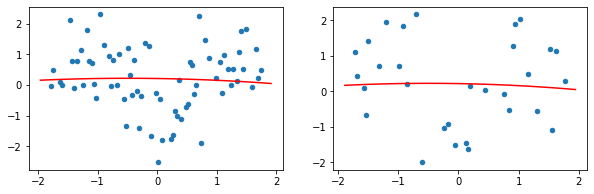

In [35]:
# Plot training and test sets and regression lines
plot_train_test_reg_curve(X_train, X_test, theta[1], theta[0])

In [36]:
# Compute training and test MSE
mse(X_train, y_train, w, b), mse(X_test, y_test, w, b)

(1.0707226217544172, 1.3976157699394938)

In [37]:
# Compute training and test R2
r2(X_train, y_train, w, b), r2(X_test, y_test, w, b)

(0.0007948731918778762, 0.002201711652872418)

In [38]:
# Train polynomial regression for increasing polynomial degree
degrees = range(1, 10)
w_all, b_all = {}, {}
for d in degrees:
    poly = PolynomialFeatures(d, include_bias=False).fit(X_train)
    X_train_poly = poly.transform(X_train)
    theta = normal_equation(X_train_poly, y_train)
    w_all[d] = theta[1:]
    b_all[d] = theta[0]

In [39]:
# Plot data and regression curves
def plot_poly(X, y, w_all, b_all, poly, res=100):
    plt.scatter(X, y, s=20)
    degrees = list(w_all.keys())
    colors = plt.cm.rainbow(np.linspace(0, 1, len(degrees)))
    XX = np.linspace(X.min(), X.max(), res).reshape(-1, 1)
    for d, c in zip(degrees, colors):
        poly = PolynomialFeatures(d, include_bias=False).fit(X_train)
        yy = hypo(poly.transform(XX), w_all[d], b_all[d])
        plt.plot(XX, yy, color=c, label=d, linewidth=1)
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")

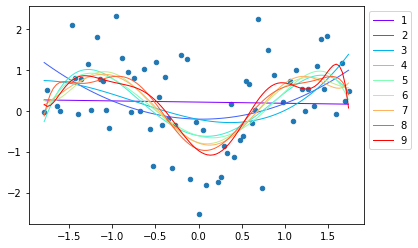

In [40]:
# Plot all polynomal regression curves for the training set
plot_poly(X_train, y_train, w_all, b_all, poly)

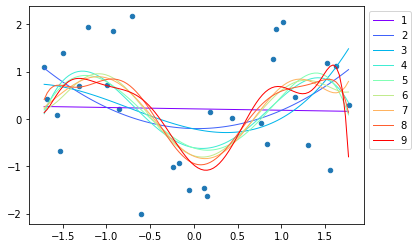

In [41]:
# Plot all polynomal regression curves for the test set
plot_poly(X_test, y_test, w_all, b_all, poly)

In [42]:
def plot_train_test_poly_mse(X_train, X_test, y_train, y_test, w_all, b_all):
    """Plot training and test MSE trends for increasing polynomial degrees side
    by side.
        
    Parameter
    ---------
        X_train : ndarray of shape (n_samples, n_features)
            Training features.
        X_train : ndarray of shape (n_samples, n_features)
            Test features.   
        y_train : ndarray of shape (n_samples,)
            Training labels.
        y_test : ndarray of shape (n_samples,)
            Test labels.
        w_all : dict
            Weights for all polynomial degrees.
        b_all : dict
            Biases for all polynomial degrees.
    """
    mse_train, mse_test = [], []
    for d in list(w_all.keys()):
        poly = PolynomialFeatures(d, include_bias=False)
        y_train_pred = hypo(poly.fit_transform(X_train), w_all[d], b_all[d])
        y_test_pred = hypo(poly.fit_transform(X_test), w_all[d], b_all[d])
        mse_train.append(mean_squared_error(y_train, y_train_pred))
        mse_test.append(mean_squared_error(y_test, y_test_pred))


    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8.5, 3))
    axs[0].set(title="Training", xlabel="Polynomial degree", ylabel="MSE")
    axs[1].set(title="Test", xlabel="Polynomial degree", ylabel="MSE")
    axs[0].plot(degrees, mse_train)
    axs[1].plot(degrees, mse_test)
    fig.tight_layout()
    plt.show()

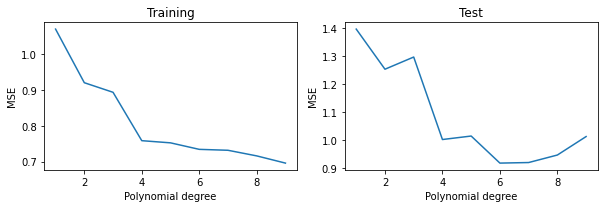

In [43]:
# Plot training and test MSE trends for increasing polynomial degrees
plot_train_test_poly_mse(X_train, X_test, y_train, y_test, w_all, b_all)

### Bias-variance trade-off

<table><tr>
<td> <img src=https://miro.medium.com/max/700/1*On4Uk9Favg50ylBOak-ECQ@2x.png alt="bias-and-variance" heigth="100"/> <td>
<td> <img src=https://miro.medium.com/max/700/1*nSpgb17nJWOUSzKzXI3ilw@2x.png alt="bias-variance-total-error.jpg" heigth="100"/> <td>
</tr></table>

## Regularized regression

### Hypothesis

The hypothesis for (univariate) *regularized regression* is given by

$$
    h_{w, b}(x) = w x + b + \alpha \|w\|.
$$

If we add polynomial features, the hypothesis becomes

$$
    h_{w, b}(x) = \sum_{i=1}^h w_i x^i + b + \alpha \|w\| =  w_1 x + w_2 x^2 + \dots + w_h x^h + b + \alpha \|w\|, 
$$

where $h$ is the degree of the polynomial.

### Normal equation

The normal equation for *regularized regression* is given by

$$
    \theta = ( \hat{X}^T \hat{X} + \alpha \cdot L )^{-1} \hat{X}^{T} y,
$$

with

$$
    L = \begin{bmatrix} 
        0 & 0  & \dots & 0 \\
        0 & 1  & \dots & 0 \\
        \vdots & \vdots & \ddots & \vdots \\
        0 & 0  & \dots & 1 \\
        \end{bmatrix} \in \mathbb{Z}_2^{(n+1) \times (n+1)},
$$

where $\mathbb{Z}_2 = \{0, 1\}$.

In [44]:
def normal_equation_regularized(X, y, alpha):
    """Normal equation for regularized regression.
    
    Parameter
    ---------
        X : ndarray of shape (n_samples, n_features)
            Features.
        y : ndarray of shape (n_samples,)
            Labels.
        alpha : float
            Regularization stength. Smaller values yield to stronger
            regularization and vice versa.
    
    Return:
    -------
        theta : ndarray of shape (n_features + 1,)
            Weight(s) and bias.
    """
    L = np.zeros((X.shape[1] + 1, X.shape[1] + 1))
    np.fill_diagonal(L, 1)
    L[0, 0] = 0
    X_hat = np.column_stack([np.ones(X.shape[0]), X])
    X_hat_trans = np.transpose(X_hat)
    result = np.linalg.inv(np.dot(X_hat_trans, X_hat) + alpha * L)
    result = np.dot(np.dot(result, X_hat_trans), y)
    return result

In [45]:
# Apply the normal equation
theta = normal_equation_regularized(X_train, y_train, 1.0)
w, b = theta[1], theta[0]
w, b

(-0.028773969483481914, 0.21206549513282744)

In [46]:
# Train polynomial regression for increasing polynomial degree
degrees = range(1, 10)
w_all, b_all = {}, {}
for d in degrees:
    poly = PolynomialFeatures(d, include_bias=False).fit(X_train)
    X_train_poly = poly.transform(X_train)
    theta = normal_equation_regularized(X_train_poly, y_train, 100)
    w_all[d] = theta[1:]
    b_all[d] = theta[0]

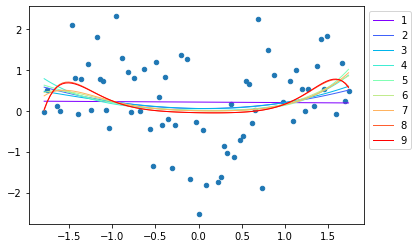

In [47]:
# Plot all polynomal regression curves
plot_poly(X_train, y_train, w_all, b_all, poly)

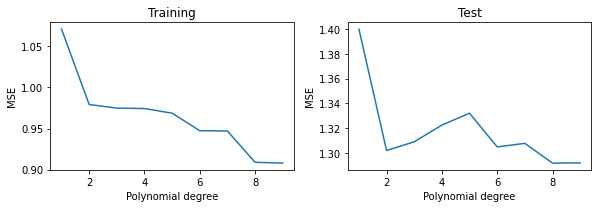

In [48]:
# Plot training and test MSE trends for increasing polynomial degrees
plot_train_test_poly_mse(X_train, X_test, y_train, y_test, w_all, b_all)

### Types of regularization

When using the $L2$ norm the resulting method is called *Ridge regression* and when using the $L1$ norm it is called *Lasso regression*.

![Alt text](https://miro.medium.com/max/722/1*GSQfWiZolZzSJfGTRaDnMg.png "")

Using $L2$ and $L1$ norm together is called *Elastic net regression*.